In [1]:
import sys
sys.path.append('../')

import os
from dotenv import load_dotenv
from openai import OpenAI
from IPython.display import Image
from protocol import Env
from agents import Group
from agent import Agent

 
[2024-12-12 14:45:13][INFO]: All agents are fully connected


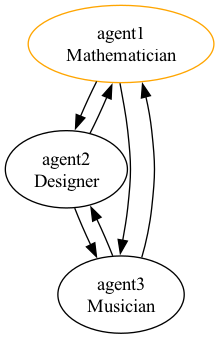

In [2]:
# load the environment variables
load_dotenv()
# create a model client
model_client = OpenAI()
# create an environment
env = Env(
    description="This is a test environment",
    members=[
        Agent(name="agent1", 
              role="Mathematician",
              description="Transfer to me if you need help with math.", 
              model_client=model_client,
              verbose=True),
              
        Agent(name="agent2", 
              role="Designer",
              description="Transfer to me if you need help with design.",
              model_client=model_client,
              verbose=True),

        Agent(name="agent3", 
              role="Musician", 
              description="Transfer to me if you need help with music.", 
              dify_access_token=os.environ.get("AGENT2_ACCESS_TOKEN"),
              verbose=True)
    ],
)
# create a group of agents
g = Group(env=env,model_client=model_client,verbose=True)

Image(g.draw_relations())

In [3]:
g.user_input("I need help with math")
g.group_messages.context

 
[2024-12-12 14:45:27][INFO]: User input (talk): I need help with math


[Message(sender='user', action='talk', result='I need help with math')]

In [ ]:
g.call_agent(next_speaker_select_mode="auto2",include_current=True,model="gpt-4o-mini",message_cut_off=3,agent=None)

g.group_messages.context